<a href="https://colab.research.google.com/github/asanka2008/test3/blob/main/Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

simple monte carlo example
            CM033    CM034   CM032   CM036         Rest  SITEPTS  TRNSPT
best      52250.0  53500.0  4950.0  8500.0  5500.000000   5200.0  3950.0
likely    55000.0  53600.0  5500.0  8550.0  7000.000000   5250.0  4000.0
worst     57750.0  53700.0  6050.0  8600.0  8700.000000   5300.0  4050.0
mean      55000.0  53600.0  5500.0  8550.0  7033.333333   5250.0  4000.0
alpha         3.0      3.0     3.0     3.0     2.916667      3.0     3.0
beta          3.0      3.0     3.0     3.0     3.083333      3.0     3.0
skewness      0.0      0.0     0.0     0.0     0.036761      0.0     0.0


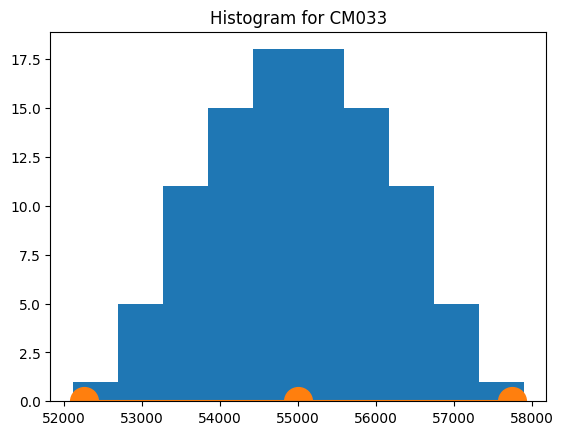

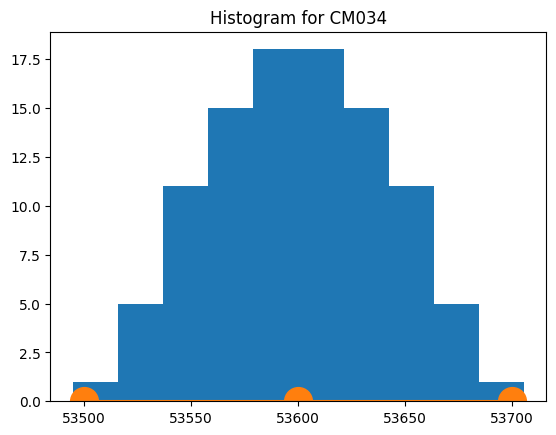

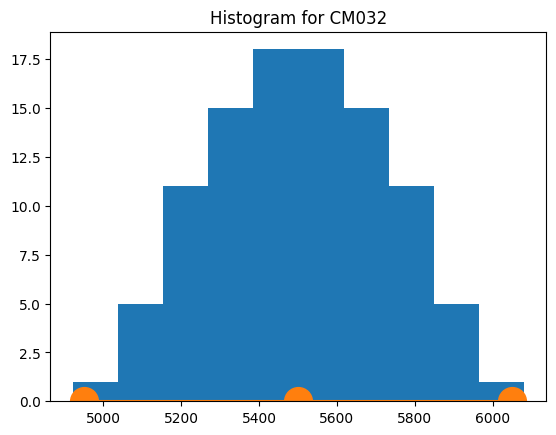

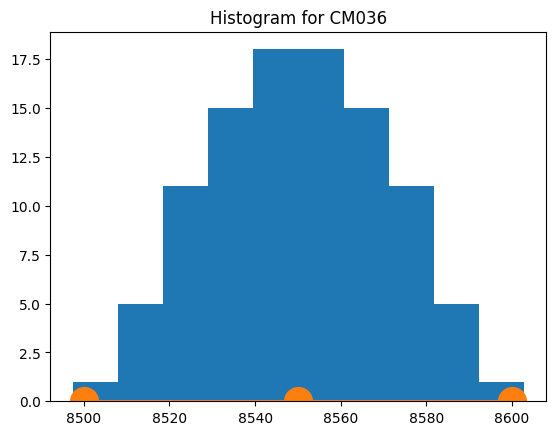

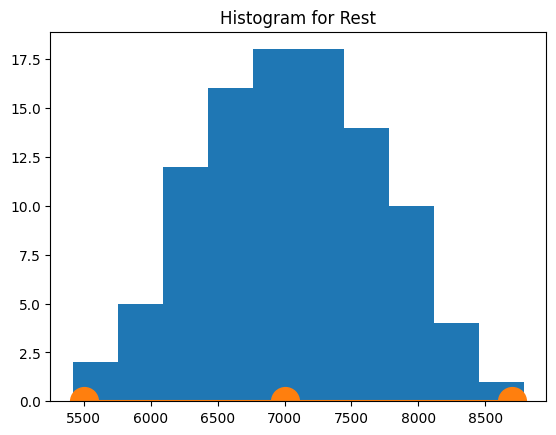

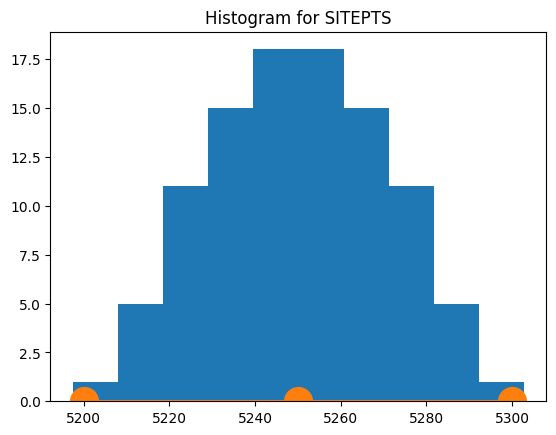

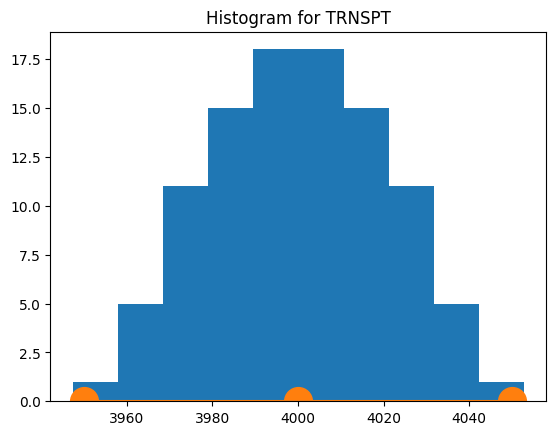

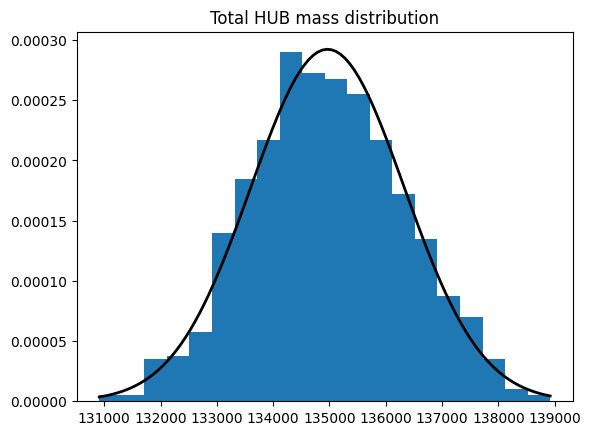

Mean is  134965 , Std Deviation is  1365 and 95% CI is  132289 to  137640  and Tolerance is % 4.0


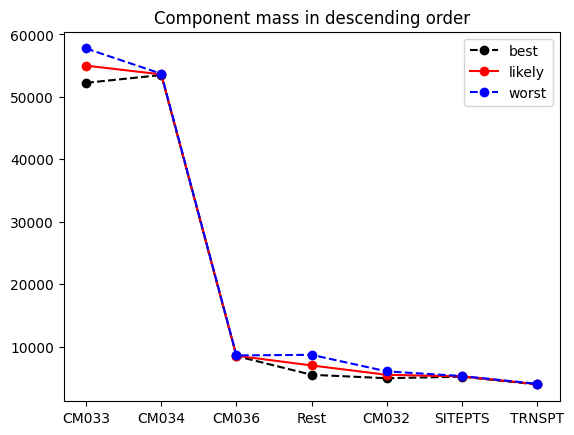

In [20]:
print("simple monte carlo example")

import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
from scipy.stats import beta
from scipy.stats import norm
import numpy as np
from random import randint


#hub weight data 
HubWeights = {
    'CM033' : [52250,55000,57750],
    'CM034' : [53500,53600,53700],
    'CM032' : [4950,5500,6050],
    'CM036' : [8500,8550,8600],
    'Rest' : [5500,7000,8700],
    'SITEPTS' : [5200,5250,5300],
    'TRNSPT' : [3950,4000,4050]
}

#Entering hub weight data into HubDT
HubDT=pd.DataFrame(HubWeights, index = ['best', 'likely', 'worst'])

 

#initialize
Mean = []
A = []
B = []
SK=[]
Y2 =pd.DataFrame([])

#Input parameters
factor = 4
seeds=100
CI=.95
#skewness of each sample data set??

for x in range(len(HubDT.columns)) :
  best = HubDT.iloc[0,x]
  likely = HubDT.iloc[1,x]
  worst = HubDT.iloc[2,x]
  mean = (best+factor*likely + worst)/(2+factor)
  #shape factors a & b
  a = ( 1 + factor*((mean-best)/(worst-best)) )
  b = ( 1 + factor*((worst-mean)/(worst-best)) )
  #skewness
  sk = (2*(b-a)*math.sqrt(a+b+1))/((a+b+2)*math.sqrt(a*b))
  #append, mean and a & b to each column
  Mean.append(mean)
  A.append(a)
  B.append(b)
  SK.append(sk)

  #populating values between best and worst based on the pert distribution
  x1 = np.linspace(0,1, seeds)
  #beta inverse normalized values for x1
  y=beta.ppf(x1,a,b)
  #beta inverse scaled values
  y1=y*(worst-best)/CI+best-(worst-best)*(1-CI)/2
  Y=pd.DataFrame(y1)
  #append Y column to Y2 dataframe
  Y2.loc[:,x]=Y

HubDT.loc[3,:] = Mean
HubDT.loc[4,:] = A
HubDT.loc[5,:] = B
HubDT.loc[6,:] = SK

HubDT.index =['best', 'likely', 'worst', 'mean', 'alpha', 'beta', 'skewness']

print(HubDT)

for x in range(len(Y2.columns)) :
  plt.title('Histogram for {}'.format(HubDT.columns[x]))
  plt.hist(Y2[x],10)
  plt.plot([HubDT.iloc[0,x],HubDT.iloc[1,x],HubDT.iloc[2,x]],[0,0,0],marker='o',ms=20)
  plt.show()

#total sum in HubDT row
S=[]
i=0
k=99
while i<1000:
  t=Y2.iloc[randint(0,k),0]+Y2.iloc[randint(0,k),1]+Y2.iloc[randint(0,k),2]+Y2.iloc[randint(0,k),3]+Y2.iloc[randint(0,k),4]+Y2.iloc[randint(0,k),5]
  S.insert(i,t)  
  i+=1

plt.hist(S,bins=20, density=True)
mu, std=norm.fit(S)



#plot normal distribution to histogram  
xmin = min(S)
xmax = max(S)
x2 = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x2, mu, std)  
plt.title('Total HUB mass distribution')
plt.plot(x2, p, 'k', linewidth=2)
plt.show()

#print: mean, std and 95% confidence interval. and tolerance%
print('Mean is ', round(mu), ', Std Deviation is ', round(std), 'and 95% CI is ', round(mu-std*1.96), 'to ', round(mu+std*1.96), ' and Tolerance is %', "{:.1f}".format((2*std*1.96)*100/mu))


#plot best, worst, likely values of HUB component weights sorted in descending order 
S=HubDT.sort_values(by='likely', axis=1, ascending=False)
plt.title('Component mass in descending order')
plt.plot(S.iloc[0,:],'ko--', label='best')
plt.plot(S.iloc[1,:], 'ro-', label='likely')
plt.plot(S.iloc[2,:],'bo--', label='worst')
plt.legend()
plt.show()

